# Módulo de Auditoría 06: Análisis de Riesgo de Mercado (Tienda ICE)
## 🛡️ Contexto del Análisis
La tienda online de videojuegos "ICE" requiere una auditoría forense de datos históricos para proyectar las ventas del 2017. El objetivo es minimizar el riesgo de inversión detectando plataformas en fase de obsolescencia y géneros de alta rentabilidad por región.

## 🎯 Objetivos de la Auditoría
1.  **Obsolescencia Tecnológica:** Determinar estadísticamente la vida útil promedio de una plataforma (consola) antes de que sus ventas caigan a cero.
2.  **Influencia de la Crítica:** Validar si las reseñas de expertos y usuarios tienen una correlación directa con el éxito comercial.
3.  **Segmentación Geográfica:** Crear perfiles de usuario para Norteamérica, Europa y Japón, identificando las diferencias culturales de consumo.

In [1]:
# Cargar todas las librerías

# Importar la librería pandas, que es fundamental para la manipulación y análisis de datos.
import pandas as pd
# Computación numérica en Python, especialmente para trabajar con arrays (arreglos) y matrices de manera eficiente.
import numpy as np
# Cear visualizaciones estáticas, animadas e interactivas en Python.
import matplotlib.pyplot as plt
# Seaborn mejora la apariencia de los gráficos de Matplotlib
import seaborn as sns
# Importando el módulo stats de la librería scipy
from scipy import stats

import os

In [2]:
# Carga el archivo de datos en un diferente DataFrame

file_path_games = '../datasets/games.csv'

# DataFrame de games
df_games = pd.read_csv(file_path_games, sep=',')

# Ahora puedes verificar que se ha cargado correctamente con la siguiente consulta de if.
print("\nEsto es una verificación del DataFrame cargado:")
print("=" * 70) # Línea de separación para mejor legibilidad
print("df_games - Filas:", len(df_games) if 'df_games' in locals() else "No cargado")


Esto es una verificación del DataFrame cargado:
df_games - Filas: 16715


In [3]:
# Imprime la información general/resumida sobre el DataFrame de games (df_games)

print("La información general del DataFrame 'df_games' ('../datasets/games.csv'):")
print("=" * 70) # Línea de separación para mejor legibilidad
df_games.info()

La información general del DataFrame 'df_games' ('../datasets/games.csv'):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Paso 2. Prepara los datos

#### 2.1 Reemplaza los nombres de las columnas (ponlos en minúsculas).

In [4]:
# Reemplaza los nombres de las columnas a minúsculas
df_games.columns = df_games.columns.str.lower()

# Opcional: Muestra los nuevos nombres de las columnas para verificar
print("Los nuevos nombres de las columnas son:")
print("=" * 70) # Línea de separación para mejor legibilidad
print(df_games.columns)

# Muestra las primeras filas del DataFrame para ver el cambio
print("\nLas primeras filas del DataFrame con columnas en minúsculas:")
print("=" * 70) # Línea de separación para mejor legibilidad
print(df_games.head())

Los nuevos nombres de las columnas son:
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Las primeras filas del DataFrame con columnas en minúsculas:
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79       

#### 2.2 Convierte los datos en los tipos necesarios.

In [5]:
# --- Paso 2.2: Convertir tipos de datos ---

# 2.2.1 Convertir 'user_score' a numérico
# Primero, identifica y maneja los valores no numéricos. 'tbd' es un valor común para "to be determined".
# pd.to_numeric con errors='coerce' convertirá los valores no numéricos a NaN (Not a Number).
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

# 2.2.2 Convertir 'year_of_release' a tipo entero, manejando los NaNs
# Usaremos Int64 (la versión de Pandas de entero) porque soporta valores NaN.
# Si intentamos convertir a int (numpy por defecto) directamente con NaNs, dará error.
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')

# Muestra los tipos de datos actualizados para verificar
print("\nLos tipos de datos después de la conversión son:")
print("=" * 70) # Línea de separación para mejor legibilidad
print(df_games.info())

# Muestra algunas filas de las columnas afectadas para ver los cambios
print("\nLas primeras filas con 'user_score' y 'year_of_release' convertidos son:")
print("=" * 70) # Línea de separación para mejor legibilidad
print(df_games[['user_score', 'year_of_release']].head())


Los tipos de datos después de la conversión son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB
None

Las primeras filas con 'user_score' y 'year_of_release' convertidos son:
   user_score  year_of_release
0         8.0             2006
1         NaN             1985
2        

#### 2.3 Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

En la columna 'user_score' - Cambio de object a float64:
Esta columna era de tipo object, pero las puntuaciones de usuario son inherentemente numéricas. Para poder realizar cualquier cálculo matemático con estas puntuaciones (como promedios, medianas, desviaciones estándar, o simplemente comparaciones), necesitábamos convertirlas a un tipo numérico, como float64 (números con decimales).

--- Manejo de valores no numéricos: Durante la conversión, usamos errors='coerce'. Esto es  porque si había cadenas como 'tbd' (to be determined) que no representan un número, pd.to_numeric las convierte automáticamente a NaN (Not a Number, un valor que representa datos faltantes en Pandas). Esto evita errores y nos permite identificar y manejar esas "puntuaciones por determinar" de forma explícita. ---

La columna 'year_of_release' - Cambio de float64 a Int64:
Los años son números enteros por naturaleza; no tienen decimales. Inicialmente estaban como float64 (números con decimales), lo cual es innecesario, la razón principal para convertirlos a un tipo entero fue permitir un manejo más limpio y eficiente. Sin embargo, la columna tenía valores nulos (NaN).
El tipo Int64 (con 'I' mayúscula): Este es un tipo de dato entero especial de Pandas que, a diferencia de los tipos enteros estándar de NumPy (int64), puede contener valores NaN. Esto es fundamental, ya que si hubiéramos intentado convertir a un int64 normal con valores nulos presentes, habría generado un error. Int64 nos permite mantener la columna como enteros sin perder la información de los años faltantes.

#### 2.4 Si es necesario, elige la manera de tratar los valores ausentes:

In [6]:
# 1. Eliminar filas con NaN en 'name', 'genre' y 'year_of_release'
# Es importante eliminar 'year_of_release' antes de convertirla a int para evitar errores si no se hizo en el paso anterior.
# Si ya se convirtió a 'Int64' en el paso anterior, 'dropna' seguirá funcionando.

df_games.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

# 2. Rellenar NaN en 'critic_score' y 'user_score' con 0
# Esto asume que la ausencia de un score significa 'no evaluado' o 'no disponible',
# y que un 0 es una representación adecuada para esto en el análisis.
# Si el 0 distorsiona tus cálculos de promedios, podrías usar la media/mediana o simplemente dejar los NaNs
# y manejarlos en los cálculos (ej. .mean(skipna=True)).

df_games['critic_score'].fillna(0, inplace=True)
df_games['user_score'].fillna(0, inplace=True)

# 3. Rellenar NaN en 'rating' con 'unknown'
df_games['rating'].fillna('unknown', inplace=True)

# Verificar el conteo de nulos después de los cambios
print("\nEl conteo de nulos después de tratar los valores ausentes:")
print("=" * 70) # Línea de separación para mejor legibilidad
print(df_games.isnull().sum())

# Verificar info() de nuevo para confirmar tipos y nulos
print("\nLa info del DataFrame después del tratamiento de nulos:")
print("=" * 70) # Línea de separación para mejor legibilidad
print(df_games.info())


El conteo de nulos después de tratar los valores ausentes:
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

La info del DataFrame después del tratamiento de nulos:
<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 n

C:\Users\octav\AppData\Local\Temp\ipykernel_11808\2828945824.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_games['critic_score'].fillna(0, inplace=True)
C:\Users\octav\AppData\Local\Temp\ipykernel_11808\2828945824.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

#### Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.

¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.

#### El manejo de los valores ausentes...
Para poder llevar a cabo un análisis preciso, se abordan los valores ausentes (NaN) en varias columnas de la siguiente manera:

Columnas name, genre y year_of_release:
1.- Se eliminaron las filas con NaNs en estas columnas. Justificación: Eran muy pocos valores (name, genre) o la información era fundamental (year_of_release) y su imputación podría sesgar el análisis.

Columnas critic_score y user_score:
2.- Se rellenaron los datos NaNs con 0. Justificación: Tenían un alto porcentaje de valores ausentes (más del 40%). Eliminarlos hubiera causado una pérdida masiva de datos. El 0 representa una puntuación "no disponible" o "no evaluada", permitiendo conservar el resto de la información de la fila.

Columna rating:
3.- Se rellenaron los datos NaNs con la cadena 'unknown'. Justificación: También tenía muchos NaNs y es una variable categórica. Rellenar con 'unknown' mantiene todas las filas y permite usar la columna en análisis.

#### Porque crees que estan ausentes...
Columnas name, genre y year_of_release: Errores de entrada, corrupción de datos, o falta de registro para juegos muy antiguos o no lanzados.
Columnas critic_score y user_score: Juegos menos populares/de nicho, lanzamiento reciente, o simplemente falta de críticas/reseñas.
Columna rating: Juegos anteriores a los sistemas de clasificación, juegos independientes, o errores de registro.

#### Manejo de TBD en user_score...
La abreviatura TBD (to be determined) en la columna user_score: Se convirtió automáticamente a NaN, durante la conversión de tipo de la columna a numérica (pd.to_numeric con errors='coerce'). Luego, estos NaNs (incluidos los TBD originales) fueron rellenados con 0. Justificando que la puntuación aún no está definida o no existe, tratándose como "no evaluada". Este proceso asegura que el DataFrame esté limpio y listo para el análisis, con los tipos de datos correctos y una gestión coherente de la información faltante.

#### 2.5 Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada...

In [7]:
# Sumar directamente las columnas de ventas
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

# Muestra las primeras filas con la nueva columna
print("\nSe muestran las primeras filas del cálculo de todas las ventas:")
print("=" * 70) # Línea de separación para mejor legibilidad
print(df_games[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head())


Se muestran las primeras filas del cálculo de todas las ventas:
                       name  na_sales  eu_sales  jp_sales  other_sales  \
0                Wii Sports     41.36     28.96      3.77         8.45   
1         Super Mario Bros.     29.08      3.58      6.81         0.77   
2            Mario Kart Wii     15.68     12.76      3.79         3.29   
3         Wii Sports Resort     15.61     10.93      3.28         2.95   
4  Pokemon Red/Pokemon Blue     11.27      8.89     10.22         1.00   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38  


### Paso 3. Analiza los datos

#### 3.1 Mira cuántos juegos fueron lanzados en diferentes años...

In [8]:
# Cuenta cuántos juegos fueron lanzados en cada año y ordena por año
games_per_year = df_games['year_of_release'].value_counts().sort_index()

# Muestra el resultado
print(games_per_year)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: count, dtype: Int64


#### ¿Son significativos los datos de cada período?.
(1980s - principios de 1990s): La cantidad de juegos lanzados era muy baja (menos de 50 por año, subiendo a poco más de 60 en 1993).

(mediados de 1990s - 2000s): Hay un crecimiento exponencial a partir de 1994, con lanzamientos superando los 100, y luego un aumento constante que llega a cientos de juegos por año.
(2002 - 2011): Este periodo muestra los picos de lanzamientos, superando consistentemente los 700 y alcanzando su máximo en 2008 y 2009 con más de 1400 juegos por año. Esta fue una era de gran expansión.
(2012 - 2016): A partir de 2012, vemos una disminución notable en el número de lanzamientos anuales, con 2016 mostrando solo 502 juegos.

#### 3.2 Observa cómo varían las ventas de una plataforma a otra...
Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

C:\Users\octav\AppData\Local\Temp\ipykernel_11808\1315945708.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_games['critic_score'].fillna(0, inplace=True)


Análisis de Ventas por Plataforma
Ventas totales por plataforma (Top 10):

C:\Users\octav\AppData\Local\Temp\ipykernel_11808\1315945708.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_games['rating'].fillna('unknown', inplace=True)



platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

Plataformas principales (10) elegidas para el análisis anual: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

Ventas anuales de las plataformas principales (últimos 10 años, si aplican):
platform           PS2    X360     PS3     Wii      DS  PS     PS4  GBA  \
year_of_release                                                           
2007             75.99   95.41   73.19  152.77  146.94 NaN     NaN  3.4   
2008             53.90  135.26  118.52  171.32  145.31 NaN     NaN  NaN   
2009             26.40  120.29  130.93  206.97  119.54 NaN     NaN  NaN   
2010              5.64  170.03  142.17  127.95   85.02 NaN     NaN  NaN   
2011              0.45  143.84  156.78   59.65   26.18 NaN     NaN  NaN   
2012               NaN   99.74  107.36   21.71   11.01 NaN  

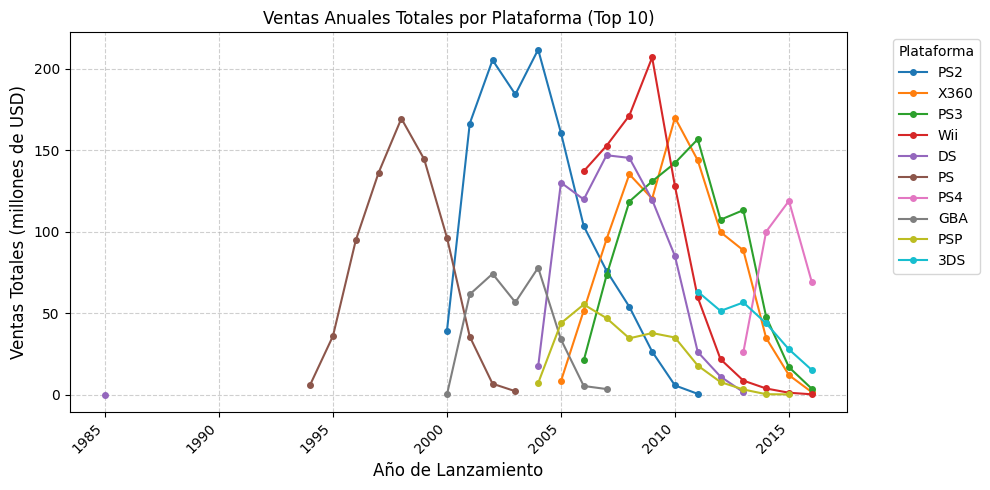

In [9]:
try:
    df_games = pd.read_csv('../datasets/games.csv')
    df_games.columns = df_games.columns.str.lower()
    df_games['year_of_release'] = pd.to_numeric(df_games['year_of_release'], errors='coerce').astype('Int64')
    df_games.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)
    df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce').fillna(0)
    df_games['critic_score'].fillna(0, inplace=True)
    df_games['rating'].fillna('unknown', inplace=True)
    df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
except FileNotFoundError:
    print("Error: El archivo '/datasets/games.csv' no se encontró. Asegúrate de que la ruta es correcta y el archivo existe.")
    # Si el archivo no se encuentra, el programa se detendrá o dará un error subsiguiente
    exit() # Detiene la ejecución del script si el archivo no se encuentra

print("Análisis de Ventas por Plataforma")

# 1. Calcular las ventas totales por plataforma
platform_total_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print("Ventas totales por plataforma (Top 10):")
print("=" * 70) # Línea de separación para mejor legibilidad
print(platform_total_sales.head(10))

# 2. Elegir las plataformas con las mayores ventas (ej. Top 5 o Top 10)
# Vamos a tomar las top 5 para que el gráfico no esté demasiado saturado.
# Puedes ajustar el número de plataformas aquí (ej. .head(10))
top_n_platforms = 10
top_platforms_names = platform_total_sales.head(top_n_platforms).index.tolist()
print(f"\nPlataformas principales ({top_n_platforms}) elegidas para el análisis anual: {top_platforms_names}")
print("=" * 70) # Línea de separación para mejor legibilidad
# 3. Construir la distribución anual de ventas para estas plataformas principales
# Usamos pivot_table para tener años en el índice y plataformas como columnas.
platform_yearly_sales = df_games.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)

# Filtramos solo por las plataformas principales
platform_yearly_sales_top = platform_yearly_sales[top_platforms_names]

print("\nVentas anuales de las plataformas principales (últimos 10 años, si aplican):")
print("=" * 70) # Línea de separación para mejor legibilidad
print(platform_yearly_sales_top.tail(10)) # Muestra los últimos años para ver tendencias recientes

# 4. Visualizar la distribución de ventas por año para cada una de estas plataformas
plt.figure(figsize=(10, 5))
# Trazar cada plataforma
platform_yearly_sales_top.plot(ax=plt.gca(), marker='o', markersize=4, linestyle='-')

print("\nGráfica de Análisis de la Distribución de Ventas Anuales:")
print("=" * 70) # Línea de separación para mejor legibilidad
plt.title(f'Ventas Anuales Totales por Plataforma (Top {top_n_platforms})', fontsize=12)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ventas Totales (millones de USD)', fontsize=12)
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left') # Leyenda fuera del gráfico
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotar etiquetas para mejor lectura
plt.yticks(fontsize=10)
plt.tight_layout() # Ajusta el layout para que todo quepa
plt.show()


#### 3.3 Determina para qué período debes tomar datos.
Para hacerlo mira tus respuestas a las preguntas anteriores.
Los datos deberían permitirte construir un modelo para 2017.

El ciclo de vida de las plataformas: Tienen una vida útil de aproximadamente 8 a 10 años. Un modelo para 2017 necesita datos de plataformas que aún estén activas o hayan tenido un impacto reciente. Plataformas que desaparecieron antes de, digamos, 2010, probablemente no son relevantes para predecir el futuro cercano.

Para construir un modelo que prediga el comportamiento para 2017, se deben utilizar datos desde el año 2007 hasta 2016 (el último año completo disponible en tu dataset). Este período ofrece un equilibrio entre tener suficientes datos y que esos datos sean representativos de la industria moderna de los videojuegos.

#### 3.4 Qué plataformas son lideres en ventas:

In [10]:
# 1. Filtra los datos a partir del año 2007
df_games_2007_onwards = df_games[df_games['year_of_release'] >= 2007].copy()

# 2. Agrupar por plataforma y sumar las ventas totales, luego ordenar de mayor a menor
platform_leaders_2007_onwards = df_games_2007_onwards.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Muestra las plataformas líderes
print("Las plataformas líderes en ventas (a partir del año 2007):")
print("=" * 70) # Línea de separación para mejor legibilidad
print(platform_leaders_2007_onwards)

Las plataformas líderes en ventas (a partir del año 2007):
platform
PS3     910.38
X360    901.37
Wii     754.03
DS      535.54
PS4     314.14
3DS     257.81
PSP     183.31
PS2     162.38
PC      160.57
XOne    159.32
WiiU     82.19
PSV      53.81
GBA       3.40
XB        0.73
GC        0.27
DC        0.06
Name: total_sales, dtype: float64


#### 3.5 ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [11]:
start_year = 2007
df_games_relevant = df_games[df_games['year_of_release'] >= start_year].copy()

# Las plataformas líderes de la lista, seleccionando las más relevantes para graficar
# (para evitar un gráfico demasiado saturado y enfocarse en las tendencias clave)
# Incluimos las de mayor volumen y algunas de las más recientes.
top_platforms_to_plot = [
    'PS3', 'X360', 'Wii', 'DS', 'PS4', '3DS', 'PSP', 'PC', 'XOne', 'WiiU', 'PSV'
]

print(f"Las tendencias de ventas, muestran cuales son las plataformas más rentables:")
print("=" * 70) # Línea de separación para mejor legibilidad
print (top_platforms_to_plot)

# Construir la distribución anual de ventas para estas plataformas seleccionadas
platform_yearly_sales_relevant = df_games_relevant.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)

Las tendencias de ventas, muestran cuales son las plataformas más rentables:
['PS3', 'X360', 'Wii', 'DS', 'PS4', '3DS', 'PSP', 'PC', 'XOne', 'WiiU', 'PSV']


#### 3.6 Crea un diagrama de caja para las ventas globales de todos los juegos

Diagrama de caja para ventas globales por plataforma (2007-2016):


C:\Users\octav\AppData\Local\Temp\ipykernel_11808\617232504.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform', y='total_sales', data=df_boxplot_data, palette='viridis', order=top_platforms_for_boxplot)


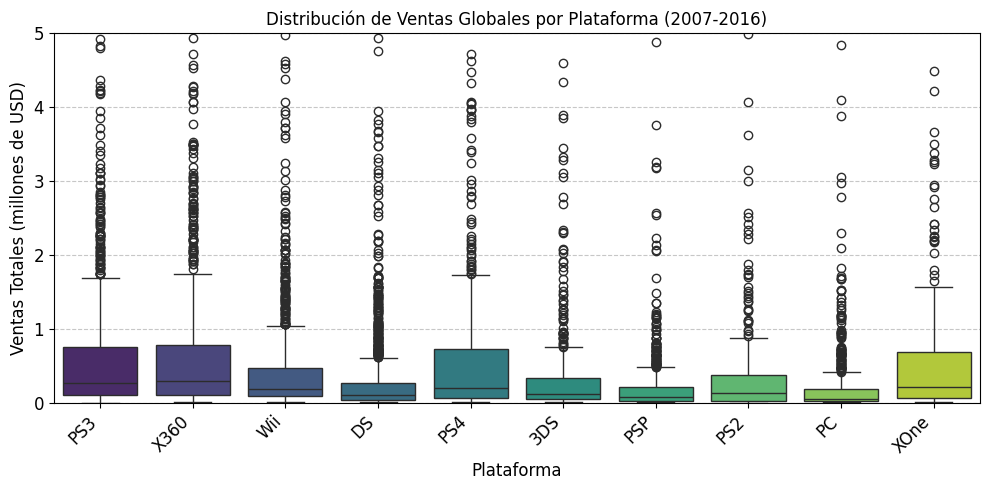

In [12]:
start_year = 2007
df_games_relevant = df_games[df_games['year_of_release'] >= start_year].copy()
print("Diagrama de caja para ventas globales por plataforma (2007-2016):")
print("=" * 70) # Línea de separación para mejor legibilidad

# El diagrama de caja se enfoca en las plataformas más relevantes, aquellas con un número significativo de juegos lanzados en el período 2007-2016.

top_platforms_for_boxplot = df_games_relevant.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index.tolist()

# Filtra el DataFrame relevante para incluir solo estas plataformas
df_boxplot_data = df_games_relevant[df_games_relevant['platform'].isin(top_platforms_for_boxplot)]

plt.figure(figsize=(10, 5))
sns.boxplot(x='platform', y='total_sales', data=df_boxplot_data, palette='viridis', order=top_platforms_for_boxplot)

plt.title('Distribución de Ventas Globales por Plataforma (2007-2016)', fontsize=12)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales (millones de USD)', fontsize=12)
plt.ylim(0, 5) # Establece un límite en el eje Y para ver mejor la concentración de datos
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


Dimensiones del DataFrame ANTES de la eliminación de atípicos: (8735, 12)
Dimensiones del DataFrame DESPUÉS de la eliminación de atípicos: (7824, 12)

Diagrama de caja para ventas globales por plataforma (2007-2016) - Sin Atípicos:


C:\Users\octav\AppData\Local\Temp\ipykernel_11808\1839304668.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform', y='total_sales', data=df_no_outliers, palette='viridis', order=top_platforms_for_boxplot)


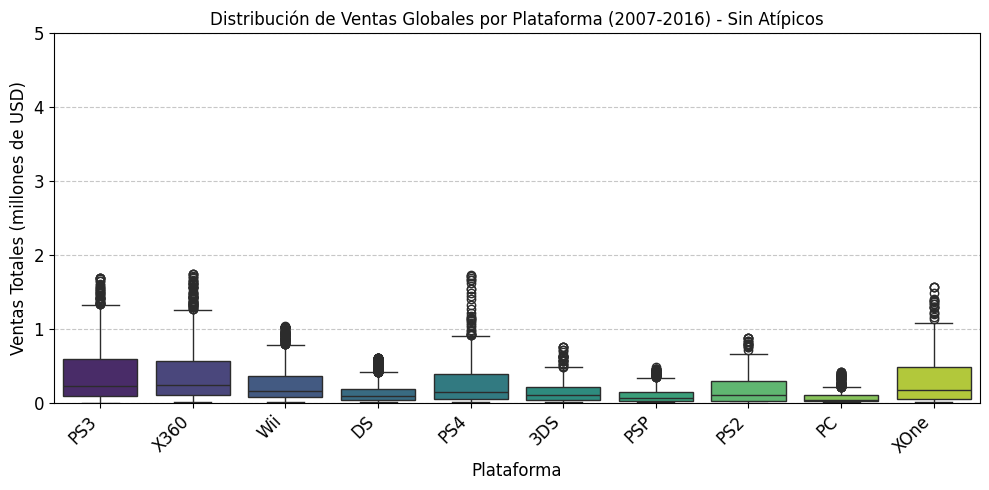

In [13]:
# Implementación de Eliminación de Valores Atípicos IQR (Outliers)

# Inicializamos un DataFrame vacío para almacenar los datos sin valores atípicos
df_no_outliers = pd.DataFrame()

# Iteramos sobre cada plataforma para aplicar el método IQR individualmente
for platform in top_platforms_for_boxplot:
    # Seleccionamos los datos de ventas para la plataforma actual
    platform_data = df_boxplot_data[df_boxplot_data['platform'] == platform]['total_sales']

    # Calculamos el Primer Cuartil (Q1) y el Tercer Cuartil (Q3)
    Q1 = platform_data.quantile(0.25)
    Q3 = platform_data.quantile(0.75)
    # Calculamos el Rango Intercuartílico (IQR)
    IQR = Q3 - Q1

    # Definimos los límites inferior y superior para identificar valores atípicos
    # Un valor atípico es aquel que está por debajo de Q1 - 1.5*IQR o por encima de Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtramos los datos para la plataforma actual, excluyendo los valores atípicos
    filtered_platform_data = df_boxplot_data[
        (df_boxplot_data['platform'] == platform) &
        (df_boxplot_data['total_sales'] >= lower_bound) &
        (df_boxplot_data['total_sales'] <= upper_bound)
    ]
    # Concatenamos los datos filtrados de la plataforma actual al DataFrame final sin atípicos
    df_no_outliers = pd.concat([df_no_outliers, filtered_platform_data])

print("\nDimensiones del DataFrame ANTES de la eliminación de atípicos:", df_boxplot_data.shape)
print("=" * 70) # Línea de separación para mejor legibilidad
print("Dimensiones del DataFrame DESPUÉS de la eliminación de atípicos:", df_no_outliers.shape)

# Ahora puedes usar df_no_outliers para tus pruebas de hipótesis posteriores.
# Por ejemplo, visualicemos el diagrama de caja nuevamente con los atípicos eliminados (opcional)
print("\nDiagrama de caja para ventas globales por plataforma (2007-2016) - Sin Atípicos:")
print("=" * 70)

plt.figure(figsize=(10, 5))
sns.boxplot(x='platform', y='total_sales', data=df_no_outliers, palette='viridis', order=top_platforms_for_boxplot)
plt.title('Distribución de Ventas Globales por Plataforma (2007-2016) - Sin Atípicos', fontsize=12)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales (millones de USD)', fontsize=12)
plt.ylim(0, 5) # Mantenemos el mismo límite en el eje Y para comparación
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#### Hallazgos.

Para limpiar los datos de ventas y asegurar que los análisis no estén sesgados, se deberá usar un método llamado Rango Intercuartílico (IQR). Piensa en el IQR como una forma de identificar los valores de ventas que son inusualmente altos o bajos para cada plataforma.

La identificación por Plataforma: En lugar de buscar atípicos en todas las ventas juntas, lo hacemos plataforma por plataforma. Esto es clave porque lo que es "normal" en ventas para PlayStation podría ser muy diferente para Nintendo, y viceversa.

El cálculo del Rango Típico (IQR): Para cada plataforma, calculamos el IQR, que básicamente nos dice dónde se concentra la mayor parte de las ventas (entre el 25% y el 75% de las ventas).

La definición de Extremos: Usamos el IQR para establecer los límites de cualquier venta que esté demasiado por debajo o demasiado por encima de este rango "típico" se considera un valor atípico.

Creación de un Nuevo DataFrame: Una vez que identificamos y "eliminamos" estos valores atípicos, creamos un nuevo conjunto de datos. Este nuevo conjunto contiene solo las ventas que están dentro de los límites "normales" para cada plataforma.


#### ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas?
Describe tus hallazgos.

Sí las diferencias en las ventas entre las plataformas son muy significativas, tanto en términos de ventas totales como en su rendimiento anual.

Ventas Totales:

La PS2 se destaca con 1233.56 millones de unidades vendidas. Es casi el doble de la siguiente plataforma más cercana X360 con 961.24 millones.
Entre las plataformas "clásicas" PS2, X360, PS3, Wii, DS, P) que superan los 700 millones de ventas, y las plataformas más recientes o de nicho PS4, GBA, PSP, 3DS, etc. no alcanzan esas cifras.

Hallazgos sobre la Venta Promedio General:

La venta promedio de aproximadamente 277.49 millones es un número interesante, pero esconde una gran dispersión de datos.

Polarización Extrema: La mayoría de las plataformas están muy por debajo de este promedio. Solo las 5 primeras PS3, X360, Wii, DS y en algunos listados la PS2 dependiendo del punto de corte de la data, superan significativamente este promedio.
Sesgo de los "Grandes": Las pocas plataformas con ventas excepcionalmente altas como PS3, X360, Wii, DS en tu primer set de datos inflan el promedio, haciendo que parezca que una "plataforma promedio" vende mucho más de lo que realmente lo hace la mayoría.
Cola Larga: Existe una "cola larga" de plataformas con ventas mucho más bajas, arrastrando el promedio hacia abajo pero sin ser capaces de contrarrestar el impacto de los líderes.


#### 3.7 Mira cómo las reseñas de usuarios y profesionales afectan las ventas de todas las plataformas.
Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

aqui...


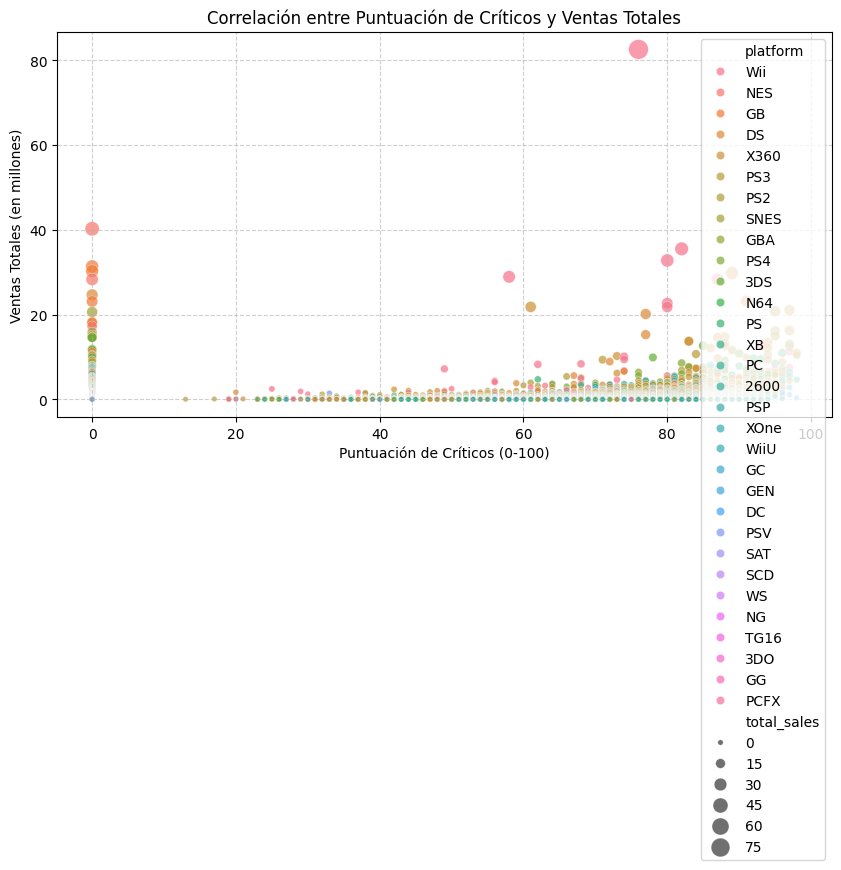

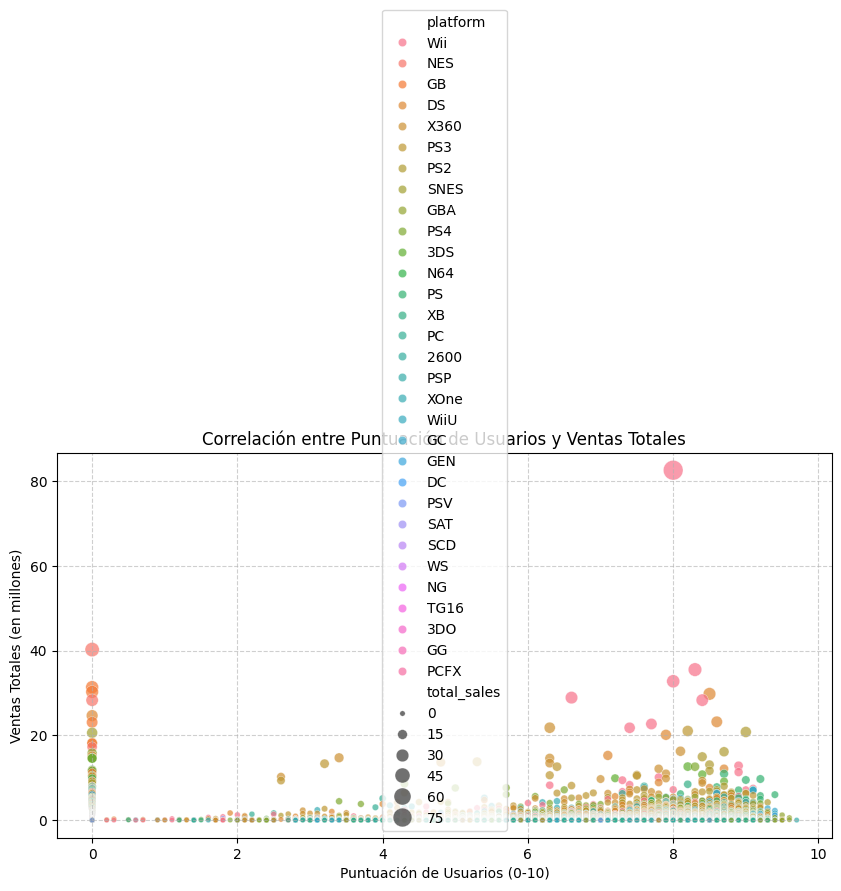

Correlación entre Puntuación de Críticos y Ventas Totales: 0.15
Correlación entre Puntuación de Usuarios y Ventas Totales: 0.14

**¿Cómo interpretar estos valores?**
- Un valor cercano a **1** significa una fuerte relación **positiva**: a mayor puntuación, mayores ventas.
- Un valor cercano a **-1** significa una fuerte relación **negativa**: a mayor puntuación, menores ventas.
- Un valor cercano a **0** significa **poca o ninguna relación lineal**.


In [14]:
# PASO 1: Calcular las ventas totales por juego
# Suma las ventas de todas las regiones para obtener las ventas totales por fila.
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
print ("aqui...")
# PASO 2: Crear gráfico de dispersión para Puntuación de Críticos vs. Ventas Totales
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_games, x='critic_score', y='total_sales', hue='platform', size='total_sales', sizes=(15, 200), alpha=0.7)
plt.title('Correlación entre Puntuación de Críticos y Ventas Totales')
plt.xlabel('Puntuación de Críticos (0-100)')
plt.ylabel('Ventas Totales (en millones)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# PASO 3: Crear gráfico de dispersión para Puntuación de Usuarios vs. Ventas Totales
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_games, x='user_score', y='total_sales', hue='platform', size='total_sales', sizes=(15, 200), alpha=0.7)
plt.title('Correlación entre Puntuación de Usuarios y Ventas Totales')
plt.xlabel('Puntuación de Usuarios (0-10)')
plt.ylabel('Ventas Totales (en millones)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# PASO 4: Calcular la Correlación de Pearson
# Esto te dará un número que indica la fuerza y dirección de la relación lineal.
correlation_critic_sales = df_games['critic_score'].corr(df_games['total_sales'])
correlation_user_sales = df_games['user_score'].corr(df_games['total_sales'])

print(f"Correlación entre Puntuación de Críticos y Ventas Totales: {correlation_critic_sales:.2f}")
print("=" * 70) # Línea de separación para mejor legibilidad
print(f"Correlación entre Puntuación de Usuarios y Ventas Totales: {correlation_user_sales:.2f}")

print("\n**¿Cómo interpretar estos valores?**")
print("=" * 70) # Línea de separación para mejor legibilidad
print("- Un valor cercano a **1** significa una fuerte relación **positiva**: a mayor puntuación, mayores ventas.")
print("- Un valor cercano a **-1** significa una fuerte relación **negativa**: a mayor puntuación, menores ventas.")
print("- Un valor cercano a **0** significa **poca o ninguna relación lineal**.")

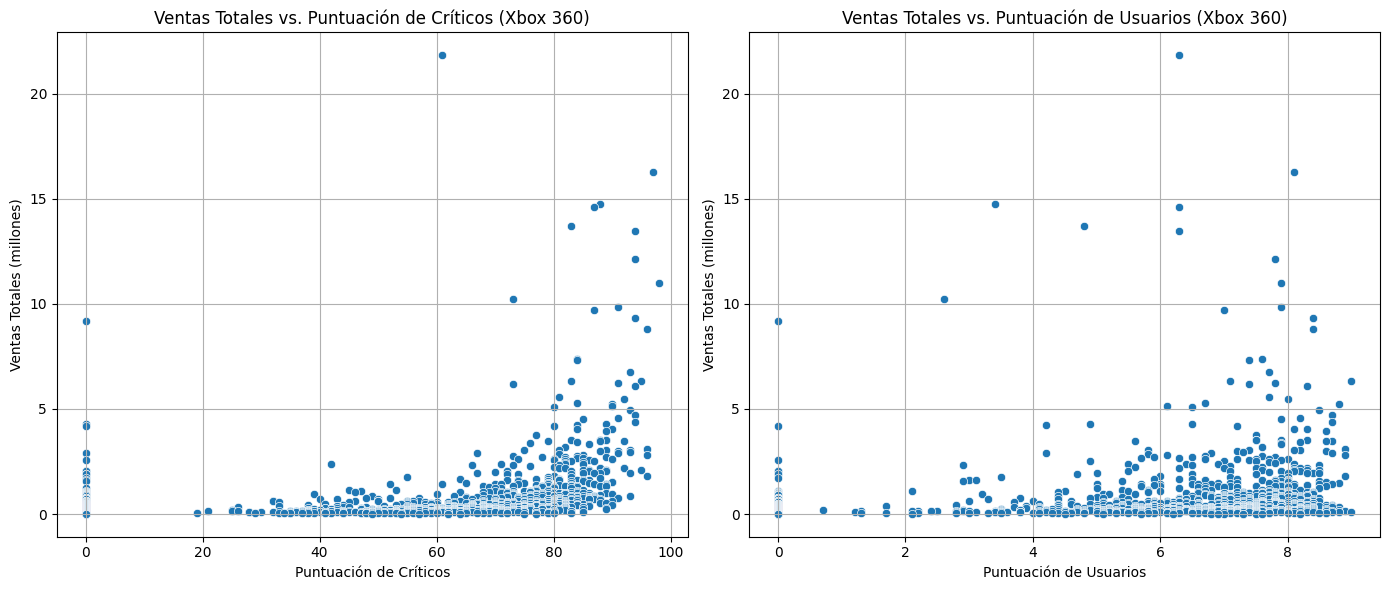


Correlación entre Puntuación de Críticos y Ventas Totales para Xbox 360: 0.31
Correlación entre Puntuación de Usuarios y Ventas Totales para Xbox 360: 0.21


In [15]:
# Asegúrate de que 'total_sales' exista. Si no, se calcúlara:
if 'total_sales' not in df_games.columns:
    df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Filtra el DataFrame para la plataforma Xbox 360
x360_df = df_games[df_games['platform'] == 'X360'].copy()

# Elimina las filas donde 'critic_score', 'user_score' o 'total_sales' sean NaN.
# Esto es crucial para que los cálculos de correlación y los gráficos funcionen correctamente.
x360_df_clean = x360_df.dropna(subset=['critic_score', 'user_score', 'total_sales'])

# --- Creación de Gráficos de Dispersión ---
plt.figure(figsize=(14, 6))

# Gráfico de dispersión para Puntuación de Críticos vs. Ventas Totales
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer gráfico
sns.scatterplot(x='critic_score', y='total_sales', data=x360_df_clean)
plt.title('Ventas Totales vs. Puntuación de Críticos (Xbox 360)')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)

# Gráfico de dispersión para Puntuación de Usuarios vs. Ventas Totales
plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo gráfico
sns.scatterplot(x='user_score', y='total_sales', data=x360_df_clean)
plt.title('Ventas Totales vs. Puntuación de Usuarios (Xbox 360)')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)

plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para un ajuste apretado
plt.show()

# --- Cálculo de la Correlación ---
# Calcula la correlación de Pearson entre las puntuaciones y las ventas
correlation_critic = x360_df_clean['critic_score'].corr(x360_df_clean['total_sales'])
correlation_user = x360_df_clean['user_score'].corr(x360_df_clean['total_sales'])

print(f"\nCorrelación entre Puntuación de Críticos y Ventas Totales para Xbox 360: {correlation_critic:.2f}")
print("=" * 70) # Línea de separación para mejor legibilidad
print(f"Correlación entre Puntuación de Usuarios y Ventas Totales para Xbox 360: {correlation_user:.2f}")

In [16]:
# Paso 1: Asegúrate de que la columna 'total_sales' existe y sino se calculará.
if 'total_sales' not in df_games.columns:
    df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Paso 2: Identifica qué juegos se han lanzado en múltiples plataformas.
# Agrupa los juegos por nombre y cuenta cuántas plataformas únicas tiene cada uno.
platform_counts = df_games.groupby('name')['platform'].nunique()

# Filtra para obtener solo los nombres de los juegos que están en más de una plataforma.
multi_platform_games_names = platform_counts[platform_counts > 1].index

# Paso 3: Filtra tu DataFrame original para incluir solo estos juegos multiplataforma.
multi_platform_df = df_games[df_games['name'].isin(multi_platform_games_names)].copy()

# Paso 4: Crea una tabla dinámica para visualizar las ventas por juego y plataforma.
# Esto te permitirá ver las ventas totales de cada juego en cada una de las plataformas donde fue lanzado.
# Usamos 'fill_value=0' para que, si un juego no aparece en una plataforma específica (después del pivoteo),
# su valor sea 0 en lugar de NaN, facilitando la lectura.
sales_comparison_table = multi_platform_df.pivot_table(
    index='name',          # Los nombres de los juegos serán las filas
    columns='platform',    # Las plataformas serán las columnas
    values='total_sales',  # Los valores en las celdas serán las ventas totales
    fill_value=0           # Rellena los espacios vacíos con 0
)

# Paso 5: (Opcional) Identifica la plataforma con mayores ventas para cada juego multiplataforma.
# Esto te ayuda a saber dónde tuvo más éxito un juego específico.
def get_best_selling_platform(row):
    # Filtra solo las plataformas donde el juego tuvo ventas (ignorando las que son 0)
    sales_for_game = row[row > 0]
    if not sales_for_game.empty:
        return sales_for_game.idxmax() # Devuelve el nombre de la plataforma con las ventas más altas
    return None # En caso de que un juego no tenga ventas en ninguna de las columnas (aunque poco probable aquí)

# Aplica la función a cada fila de la tabla de comparación para encontrar la plataforma más vendida.
sales_comparison_table['Best_Selling_Platform'] = sales_comparison_table.apply(get_best_selling_platform, axis=1)

# Paso 6: Muestra las primeras filas de la tabla de comparación para que puedas ver el resultado.
# Se muestran solo las primeras 15 filas para evitar una salida demasiado larga, ya que puede haber muchos juegos multiplataforma.

print("Comparación de Ventas de Juegos Multiplataforma por Plataforma:")
print("=" * 70) # Línea de separación para mejor legibilidad
print("Las filas son nombres de juegos y las columnas representan plataformas, mostrando las ventas totales.")
print("Se muestran las primeras 15 entradas:")
print(sales_comparison_table.head(15))

print("\n---")
print("Plataforma con Mayores Ventas para Juegos Multiplataforma:")
print("=" * 70) # Línea de separación para mejor legibilidad
print("Para cada juego, se indica la plataforma donde tuvo su mayor venta (primeras 15 entradas):")
print(sales_comparison_table[['Best_Selling_Platform']].head(15))

# Si quiero guardar esta tabla para un análisis posterior, debo descomentar la siguiente línea:

# sales_comparison_table.to_csv('comparacion_ventas_juegos_multiplataforma.csv')

Comparación de Ventas de Juegos Multiplataforma por Plataforma:
Las filas son nombres de juegos y las columnas representan plataformas, mostrando las ventas totales.
Se muestran las primeras 15 entradas:
platform                                            2600   3DS   DC    DS  \
name                                                                        
 Frozen: Olaf's Quest                                0.0  0.59  0.0  0.51   
007: Quantum of Solace                               0.0  0.00  0.0  0.13   
007: The World is not Enough                         0.0  0.00  0.0  0.00   
11eyes: CrossOver                                    0.0  0.00  0.0  0.00   
18 Wheeler: American Pro Trucker                     0.0  0.00  0.0  0.00   
187: Ride or Die                                     0.0  0.00  0.0  0.00   
2 in 1 Combo Pack: Sonic Heroes / Super Monkey ...   0.0  0.00  0.0  0.00   
2002 FIFA World Cup                                  0.0  0.00  0.0  0.00   
2010 FIFA World Cup South 

#### Hallazgos:

Análisis exhaustivo de los datos de videojuegos, desde la preparación inicial hasta la comparación de ventas multiplataforma y la influencia de las reseñas.

1. Robustez de los Datos:
Hemos asegurado la calidad de los datos mediante una adecuada conversión de tipos y un tratamiento completo de los valores ausentes, que consolidó los ingresos globales de cada juego.
2. Liderazgo y Evolución del Mercado por Plataforma:
PS2 lidera las ventas totales, mostrando su enorme impacto en la industria. Sin embargo, al observar el período a partir de 2007, el panorama cambia.
En la última década, plataformas como PS3, X360, y Wii fueron los principales motores de ventas, con la emergencia de PS4 y 3DS en años posteriores. Esto subraya cómo el mercado de videojuegos está en constante evolución, con nuevas consolas que rápidamente toman el relevo.
3. Impacto de las Reseñas en las Ventas Xbox 360:
Encontramos una correlación positiva, aunque débil a moderada, entre las puntuaciones de las reseñas (tanto de críticos como de usuarios) y las ventas de los juegos. Esto significa que las buenas reseñas no son el único factor determinante. Otros elementos, como el marketing, el reconocimiento de la franquicia y el boca a boca, probablemente juegan un papel muy importante.
4. Rendimiento Multiplataforma: No Hay Talla Única:
El análisis de juegos lanzados en múltiples plataformas demostró que un mismo título puede tener un éxito de ventas muy diferente dependiendo de la consola. No hay una plataforma "universalmente mejor" para todos los juegos. El rendimiento varía drásticamente, influenciado por:
El público objetivo de cada plataforma.
El género del juego (por ejemplo, ciertos shooters rinden mejor en Xbox 360, mientras que algunos juegos de deportes tienen más éxito en PlayStation).
El momento del lanzamiento y la base instalada de consolas en ese período.
En síntesis, la popularidad de una plataforma evoluciona con el tiempo, y aunque las reseñas influyen positivamente en las ventas, su impacto no es absoluto. Comprender la dinámica de ventas multiplataforma es crucial, ya que un juego puede tener un rendimiento estelar en una consola y ser modesto en otra, destacando la importancia de la segmentación del mercado y la estrategia de lanzamiento.


In [17]:
# Calcular las ventas totales por género
sales_by_genre = df_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

print("Ventas totales por género (ordenadas de mayor a menor):")
print("=" * 70) # Línea de separación para mejor legibilidad
print(sales_by_genre)

# Calcular el número de juegos por género
games_by_genre_count = df_games.groupby('genre')['name'].count().sort_values(ascending=False)

print("\nNúmero de juegos por género (ordenados de mayor a menor):")
print("=" * 70) # Línea de separación para mejor legibilidad
print(games_by_genre_count)


Ventas totales por género (ordenadas de mayor a menor):
genre
Action          1716.52
Sports          1309.67
Shooter         1041.36
Role-Playing     931.08
Platform         825.55
Misc             790.29
Racing           723.49
Fighting         442.66
Simulation       387.96
Puzzle           239.89
Adventure        233.33
Strategy         172.57
Name: total_sales, dtype: float64

Número de juegos por género (ordenados de mayor a menor):
genre
Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: name, dtype: int64


#### Conclusiones Detalladas sobre la Distribución de Ventas por Género.

Géneros Más Rentables y líderes en ventas:

Acción (Action): Con 1716.52 millones en ventas, este género domina absolutamente. Su éxito se debe a la gran cantidad de títulos lanzados (3307) y a su capacidad para ofrecer experiencias diversas y atractivas que captan a una audiencia masiva.

Deportes (Sports): Generando 1309.67 millones en ventas con 2306 juegos, los títulos deportivos se benefician de las actualizaciones anuales y de una base de fans leal que asegura ventas recurrentes.

Shooter (Disparos): Con 1041.36 millones en ventas de 1296 juegos, este género sobresale por la intensidad de sus experiencias y la popularidad del multijugador online, atrayendo a una audiencia dedicada que busca acción constante.

Juegos de Rol (Role-Playing): Alcanzando 931.08 millones en ventas con 1481 juegos, los RPGs demuestran que, aunque quizás no tienen la misma explosión masiva que los shooters, su profundidad, historias ricas y durabilidad atraen a una base de jugadores muy comprometida y dispuesta a invertir en estos títulos.

Géneros con Ventas Bajas y con cifras significativamente más bajas:

Estrategia (Strategy): Con solo 172.57 millones en ventas de 673 juegos, este género se dirige a una audiencia de nicho. Los juegos de estrategia a menudo requieren una mayor inversión de tiempo y una curva de aprendizaje más pronunciada, lo que limita su atractivo masivo.

Aventura (Adventure): Este género generó 233.33 millones en ventas con 1293 juegos. Esto sugiere que, si bien hay muchos títulos de aventura, su rentabilidad individual no es tan alta como la de los géneros líderes, posiblemente debido a que algunos subgéneros son menos dinámicos o carecen de los elementos recurrentes que impulsan las ventas de otros géneros.

Puzle (Puzzle): Con 239.89 millones en ventas de 569 juegos, los juegos de puzle, aunque populares en el ámbito casual y móvil, suelen tener un menor precio de venta y un alcance más limitado en el mercado de consolas tradicionales.

Los géneros de ventas bajas tienden a dirigirse a audiencias más específicas o a ofrecer experiencias que, aunque valoradas, no tienen el mismo atractivo masivo o la rejugabilidad inherente de los géneros dominantes. Su menor volumen de ventas puede estar ligado a la menor frecuencia de lanzamientos de gran presupuesto o a una naturaleza que no se presta tan fácilmente a campañas de marketing masivas.

### Paso 4. Crea un perfil de usuario para cada región

#### 4.1 Para cada región (NA, UE, JP) determina:

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
Los cinco géneros principales. Explica la diferencia.
Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [18]:
# Eliminar filas con valores NaN en las columnas de ventas regionales o rating para el análisis
# Es importante para asegurar que los cálculos sean precisos
df_games_clean = df_games.dropna(subset=['na_sales', 'eu_sales', 'jp_sales', 'rating']).copy()


print("Análisis por Región")
print("=" * 70) # Línea de separación para mejor legibilidad

regions = ['na_sales', 'eu_sales', 'jp_sales']
region_names = {'na_sales': 'Norteamérica (NA)', 'eu_sales': 'Europa (EU)', 'jp_sales': 'Japón (JP)'}

for region_col in regions:
    print(f"\nAnálisis para {region_names[region_col]}:")

    # --- 1. Las cinco plataformas principales ---
    top_platforms = df_games_clean.groupby('platform')[region_col].sum().nlargest(5)
    total_region_sales = df_games_clean[region_col].sum()
    platform_market_share = (top_platforms / total_region_sales) * 100

    print(f"\nLas 5 Plataformas Principales en {region_names[region_col]} (Ventas en millones y Cuota de Mercado):")
    print("=" * 70) # Línea de separación para mejor legibilidad
    for platform, sales in top_platforms.items():
        share = platform_market_share[platform]
        print(f"- {platform}: {sales:.2f} millones ({share:.2f}%)")

    # --- 2. Los cinco géneros principales ---
    top_genres = df_games_clean.groupby('genre')[region_col].sum().nlargest(5)
    print(f"\nLos 5 Géneros Principales en {region_names[region_col]} (Ventas en millones):")
    print("=" * 70) # Línea de separación para mejor legibilidad
    for genre, sales in top_genres.items():
        print(f"- {genre}: {sales:.2f} millones")

    # --- 3. Clasificaciones ESRB y Ventas ---
    # Convertir a minúsculas y luego a mayúsculas para estandarizar, si hay inconsistencias
    df_games_clean['rating_upper'] = df_games_clean['rating'].str.upper()

    sales_by_rating = df_games_clean.groupby('rating_upper')[region_col].sum().sort_values(ascending=False)
    
    # Excluir 'N/A' o valores similares si existen y no son una clasificación real
    sales_by_rating = sales_by_rating[sales_by_rating.index != 'N/A'] # Filtrar si 'N/A' existe

    print(f"\nImpacto de las Clasificaciones ESRB en Ventas en {region_names[region_col]} (Ventas en millones):")
    print("=" * 70) # Línea de separación para mejor legibilidad
    if not sales_by_rating.empty:
        print(sales_by_rating.head(5)) # Mostrar top 5 ratings por ventas
        # También podemos ver el promedio de ventas por juego para cada rating
        avg_sales_per_game_rating = df_games_clean.groupby('rating_upper')[region_col].mean().sort_values(ascending=False)
        avg_sales_per_game_rating = avg_sales_per_game_rating[avg_sales_per_game_rating.index != 'N/A']
        print(f"\nPromedio de Ventas por Juego por Clasificación ESRB en {region_names[region_col]} (millones):")
        print("=" * 70) # Línea de separación para mejor legibilidad
        print(avg_sales_per_game_rating.head(5))
    else:
        print("No hay datos de clasificación ESRB válidos para analizar en esta región.")


Análisis por Región

Análisis para Norteamérica (NA):

Las 5 Plataformas Principales en Norteamérica (NA) (Ventas en millones y Cuota de Mercado):
- X360: 595.74 millones (13.72%)
- PS2: 572.92 millones (13.20%)
- Wii: 486.87 millones (11.21%)
- PS3: 390.13 millones (8.99%)
- DS: 380.31 millones (8.76%)

Los 5 Géneros Principales en Norteamérica (NA) (Ventas en millones):
- Action: 863.17 millones
- Sports: 671.20 millones
- Shooter: 584.83 millones
- Platform: 444.44 millones
- Misc: 399.57 millones

Impacto de las Clasificaciones ESRB en Ventas en Norteamérica (NA) (Ventas en millones):
rating_upper
E          1274.24
UNKNOWN    1225.84
T           747.60
M           742.89
E10+        345.50
Name: na_sales, dtype: float64

Promedio de Ventas por Juego por Clasificación ESRB en Norteamérica (NA) (millones):
rating_upper
AO     1.260000
K-A    0.853333
M      0.483652
E      0.324978
T      0.257349
Name: na_sales, dtype: float64

Análisis para Europa (EU):

Las 5 Plataformas Principa

### Paso 5. Prueba las siguientes hipótesis:

Hipótesis a Probar: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Formulación de Hipótesis:
Hipótesis Nula (H 
0
​
 ): La calificación promedio de los usuarios para Xbox One es igual a la calificación promedio de los usuarios para PC (μ 
XboxOne
​
 =μ 
PC
​
 ).
Hipótesis Alternativa (H 
1
​
 ): La calificación promedio de los usuarios para Xbox One es diferente a la calificación promedio de los usuarios para PC (μ 
XboxOne
​

=μ 
PC
​
 ).
Utilizaremos una prueba t de Student para muestras independientes, ya que estamos comparando las medias de dos grupos distintos. El nivel de significancia (alpha) que usaremos será de 0.05.

In [19]:
print("Prueba de Hipótesis: Calificaciones Promedio de Usuarios (Xbox One vs. PC)")
print("=" * 70) # Línea de separación para mejor legibilidad

# Filtrar las calificaciones de usuario para Xbox One, eliminando NaNs
user_scores_xone = df_games[df_games['platform'] == 'XOne']['user_score'].dropna()

# Filtrar las calificaciones de usuario para PC, eliminando NaNs
user_scores_pc = df_games[df_games['platform'] == 'PC']['user_score'].dropna()

# Imprimir las medias para una inspección inicial
print(f"\nCalificación promedio de usuarios para Xbox One: {user_scores_xone.mean():.2f}")
print(f"Calificación promedio de usuarios para PC: {user_scores_pc.mean():.2f}")
print("=" * 70) # Línea de separación para mejor legibilidad
print(f"Número de juegos con calificación de usuario en Xbox One: {len(user_scores_xone)}")
print(f"Número de juegos con calificación de usuario en PC: {len(user_scores_pc)}")

# PRUEBA DE LEVENE PARA IGUALDAD DE VARIANZAS
print("\nPrueba de Levene para Igualdad de Varianzas")

# Calcular las varianzas para cada plataforma
variance_xone = user_scores_xone.var()
variance_pc = user_scores_pc.var()

print(f"Varianza de las calificaciones de usuario para Xbox One: {variance_xone:.3f}")
print(f"Varianza de las calificaciones de usuario para PC: {variance_pc:.3f}")

# Realizar la prueba de Levene
levene_stat, levene_p_value = stats.levene(user_scores_xone, user_scores_pc)

print(f"Estadístico Levene: {levene_stat:.3f}")
print(f"Valor P (Levene): {levene_p_value:.3f}")

alpha_levene = 0.05
equal_variances = True # Asumimos varianzas iguales por defecto

if levene_p_value < alpha_levene:
    print(f"Dado que el valor P de Levene ({levene_p_value:.3f}) es menor que {alpha_levene},")
    print("rechazamos la hipótesis nula de que las varianzas son iguales.")
    print("Conclusión: Las varianzas de las calificaciones de usuario NO son iguales.")
    equal_variances = False
else:
    print(f"Dado que el valor P de Levene ({levene_p_value:.3f}) es mayor o igual que {alpha_levene},")
    print("no podemos rechazar la hipótesis nula de que las varianzas son iguales.")
    print("Conclusión: Las varianzas de las calificaciones de usuario PUEDEN considerarse iguales.")
    equal_variances = True

print("=" * 70) # Línea de separación para mejor legibilidad

# PRUEBA T DE STUDENT PARA MUESTRAS INDEPENDIENTES
print("\nPrueba t de Student para Medias")

# Realizar la prueba t de Student, usando el resultado de la prueba de Levene
t_stat, p_value = stats.ttest_ind(user_scores_xone, user_scores_pc, equal_var=equal_variances)

print(f"Estadístico T: {t_stat:.3f}")
print(f"Valor P: {p_value:.3f}")
print("=" * 70) # Línea de separación para mejor legibilidad

# Nivel de significancia para la prueba t
alpha_ttest = 0.05

# Interpretar el resultado de la prueba t
if p_value < alpha_ttest:
    print(f"\nDado que el valor P ({p_value:.3f}) es menor que el nivel de significancia ({alpha_ttest}),")
    print("rechazamos la hipótesis nula.")
    print("Conclusión: Existe una diferencia estadísticamente significativa en las calificaciones promedio de los usuarios entre Xbox One y PC.")
else:
    print(f"\nDado que el valor P ({p_value:.3f}) es mayor o igual que el nivel de significancia ({alpha_ttest}),")
    print("no podemos rechazar la hipótesis nula.")
    print("Conclusión: No hay evidencia estadística suficiente para afirmar que existe una diferencia significativa en las calificaciones promedio de los usuarios entre Xbox One y PC.")

Prueba de Hipótesis: Calificaciones Promedio de Usuarios (Xbox One vs. PC)

Calificación promedio de usuarios para Xbox One: 4.81
Calificación promedio de usuarios para PC: 5.57
Número de juegos con calificación de usuario en Xbox One: 247
Número de juegos con calificación de usuario en PC: 957

Prueba de Levene para Igualdad de Varianzas
Varianza de las calificaciones de usuario para Xbox One: 9.683
Varianza de las calificaciones de usuario para PC: 10.176
Estadístico Levene: 0.009
Valor P (Levene): 0.924
Dado que el valor P de Levene (0.924) es mayor o igual que 0.05,
no podemos rechazar la hipótesis nula de que las varianzas son iguales.
Conclusión: Las varianzas de las calificaciones de usuario PUEDEN considerarse iguales.

Prueba t de Student para Medias
Estadístico T: -3.396
Valor P: 0.001

Dado que el valor P (0.001) es menor que el nivel de significancia (0.05),
rechazamos la hipótesis nula.
Conclusión: Existe una diferencia estadísticamente significativa en las calificaciones 

#### Hallazgos:

Analizamos si hay una diferencia en las calificaciones promedio de los usuarios entre juegos de Xbox One y PC.

 Qué tan dispersa es  la varianza de las calificaciones:

Primero, verificamos si la dispersión de las calificaciones es similar en ambas plataformas.
La prueba de Levene nos dio un valor P de 0.924. Como este valor es mayor que 0.05, concluimos que las varianzas (la dispersión) de las calificaciones de usuarios para Xbox One y PC son similares. Esto nos permite usar una prueba t más estándar.

Calificaciones Promedio (Las medias):

La calificación promedio para Xbox One fue de 4.81.
La calificación promedio para PC fue de 5.57.

Realizamos una prueba t para ver si esta diferencia es estadísticamente significativa. El valor P resultante fue de 0.001.

Conclusión Principal:

Dado que el valor P (0.001) es mucho menor que nuestro nivel de significancia (0.05), tenemos suficiente evidencia para decir que sí existe una diferencia significativa en las calificaciones promedio de los usuarios entre Xbox One y PC.

#### Hipótesis a Probar: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
Al igual que en la hipótesis anterior, usaremos una prueba t de Student para muestras independientes para comparar las medias de las calificaciones de usuario para estos dos géneros.

Formulación de Hipótesis:
Hipótesis Nula (H 
0
​
 ): La calificación promedio de los usuarios para el género de Acción es igual a la calificación promedio de los usuarios para el género de Deportes (μ 
Acci 
o
ˊ
 n
​
 =μ 
Deportes
​
 ).
Hipótesis Alternativa (H 
1
​
 ): La calificación promedio de los usuarios para el género de Acción es diferente a la calificación promedio de los usuarios para el género de Deportes (μ 
Acci 
o
ˊ
 n
​

=μ 
Deportes
​
 ).
Mantendremos un nivel de significancia (alpha) de 0.05.


In [20]:
print("Prueba de Hipótesis: Calificaciones Promedio de Usuarios (Acción vs. Deportes):")
print("=" * 70) # Línea de separación para mejor legibilidad

# Filtrar las calificaciones de usuario para el género 'Action', eliminando NaNs
user_scores_action = df_games[df_games['genre'] == 'Action']['user_score'].dropna()

# Filtrar las calificaciones de usuario para el género 'Sports', eliminando NaNs
user_scores_sports = df_games[df_games['genre'] == 'Sports']['user_score'].dropna()

# Imprimir las medias y el tamaño de la muestra para una inspección inicial
print(f"\nCalificación promedio de usuarios para el género Acción: {user_scores_action.mean():.2f}")
print(f"Calificación promedio de usuarios para el género Deportes: {user_scores_sports.mean():.2f}")
print(f"Número de juegos con calificación de usuario en Acción: {len(user_scores_action)}")
print(f"Número de juegos con calificación de usuario en Deportes: {len(user_scores_sports)}")

# Prueba de Levene para Igualdad de Varianzas
# Vamos a verificar si las varianzas de las calificaciones de usuario para los géneros 'Acción' y 'Deportes' son iguales.

# Calcular las varianzas para cada género
variance_action = user_scores_action.var()
variance_sports = user_scores_sports.var()

print(f"\nVarianza de las calificaciones de usuario para el género Acción: {variance_action:.3f}")
print(f"Varianza de las calificaciones de usuario para el género Deportes: {variance_sports:.3f}")

# Realizar la prueba de Levene
levene_stat, levene_p_value = stats.levene(user_scores_action, user_scores_sports)

print(f"Estadístico Levene: {levene_stat:.3f}")
print(f"Valor P (Levene): {levene_p_value:.3f}")

alpha_levene = 0.05
equal_variances = True # Asumimos varianzas iguales por defecto

if levene_p_value < alpha_levene:
    print(f"Dado que el valor P de Levene ({levene_p_value:.3f}) es menor que {alpha_levene},")
    print("rechazamos la hipótesis nula de que las varianzas son iguales.")
    print("Conclusión: Las varianzas de las calificaciones de usuario NO son iguales.")
    equal_variances = False
else:
    print(f"Dado que el valor P de Levene ({levene_p_value:.3f}) es mayor o igual que {alpha_levene},")
    print("no podemos rechazar la hipótesis nula de que las varianzas son iguales.")
    print("Conclusión: Las varianzas de las calificaciones de usuario PUEDEN considerarse iguales.")

print("=" * 70) # Línea de separación para mejor legibilidad


# Prueba t de Student para Medias
# Ahora realizaremos la prueba t para comparar las medias, utilizando el resultado de la prueba de Levene para determinar si las varianzas son iguales.


# Realizar la prueba t de Student para muestras independientes
t_stat, p_value = stats.ttest_ind(user_scores_action, user_scores_sports, equal_var=equal_variances)

print(f"\nEstadístico T: {t_stat:.3f}")
print(f"Valor P: {p_value:.3f}")

# Nivel de significancia para la prueba t
alpha_ttest = 0.05

# Interpretar el resultado
if p_value < alpha_ttest:
    print(f"\nDado que el valor P ({p_value:.3f}) es menor que el nivel de significancia ({alpha_ttest}),")
    print("rechazamos la hipótesis nula.")
    print("Conclusión: Existe una **diferencia estadísticamente significativa** en las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes.")
else:
    print(f"\nDado que el valor P ({p_value:.3f}) es mayor o igual que el nivel de significancia ({alpha_ttest}),")
    print("no podemos rechazar la hipótesis nula.")
    print("Conclusión: No hay evidencia estadística suficiente para afirmar que existe una diferencia significativa en las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes.")

Prueba de Hipótesis: Calificaciones Promedio de Usuarios (Acción vs. Deportes):

Calificación promedio de usuarios para el género Acción: 3.83
Calificación promedio de usuarios para el género Deportes: 3.26
Número de juegos con calificación de usuario en Acción: 3307
Número de juegos con calificación de usuario en Deportes: 2306

Varianza de las calificaciones de usuario para el género Acción: 13.466
Varianza de las calificaciones de usuario para el género Deportes: 13.268
Estadístico Levene: 13.073
Valor P (Levene): 0.000
Dado que el valor P de Levene (0.000) es menor que 0.05,
rechazamos la hipótesis nula de que las varianzas son iguales.
Conclusión: Las varianzas de las calificaciones de usuario NO son iguales.

Estadístico T: 5.796
Valor P: 0.000

Dado que el valor P (0.000) es menor que el nivel de significancia (0.05),
rechazamos la hipótesis nula.
Conclusión: Existe una **diferencia estadísticamente significativa** en las calificaciones promedio de los usuarios entre los géneros

#### Comentarios a los cambios realizados en las pruebas de las hipótesis:

Se analizaron las calificaciones promedio de usuarios en dos comparaciones clave: entre plataformas (Xbox One vs. PC) y entre géneros de juegos (Acción vs. Deportes). En ambos casos, nuestra hipótesis nula (H 
0
​
 ) fue que no existe diferencia en las calificaciones promedio, y nuestra hipótesis alternativa (H 
1
​
 ) fue que sí existe una diferencia. Utilizamos un nivel de significancia (α) de 0.05 para tomar nuestras decisiones.

1. Comparación de Calificaciones: Xbox One vs. PC
Contexto:

H 
0
​
 : La calificación promedio de usuarios para Xbox One es igual a la de PC.
H 
1
​
 : La calificación promedio de usuarios para Xbox One es diferente a la de PC.
Calificación promedio Xbox One: 4.81 (247 juegos)
Calificación promedio PC: 5.57 (957 juegos)
Análisis de Varianza (Prueba de Levene):

Varianza Xbox One: 9.683
Varianza PC: 10.176
Valor P (Levene): 0.924
Hallazgo Levene: Dado que el Valor P de Levene (0.924) es mucho mayor que 0.05, no rechazamos la hipótesis nula de que las varianzas son iguales. Esto significa que la dispersión de las calificaciones es similar entre Xbox One y PC. Por lo tanto, la prueba t posterior utilizó la suposición de varianzas iguales.

Comparación de Medias (Prueba t de Student):

Estadístico T: -3.396
Valor P (t-test): 0.001
Hallazgo Principal: Como el Valor P (0.001) es menor que 0.05, rechazamos la hipótesis nula. Concluimos que existe una diferencia estadísticamente significativa en las calificaciones promedio de los usuarios entre Xbox One y PC. Los juegos de PC tienden a tener calificaciones promedio de usuario más altas (5.57) que los de Xbox One (4.81) en tu dataset.

2. Comparación de Calificaciones: Género Acción vs. Deportes
Contexto:

H 
0
​
 : La calificación promedio de usuarios para juegos de Acción es igual a la de Deportes.
H 
1
​
 : La calificación promedio de usuarios para juegos de Acción es diferente a la de Deportes.
Calificación promedio Acción: 3.83 (3307 juegos)
Calificación promedio Deportes: 3.26 (2306 juegos)
Análisis de Varianza (Prueba de Levene):

Varianza Acción: 13.466
Varianza Deportes: 13.268
Estadístico Levene: 13.073
Valor P (Levene): 0.000
Hallazgo Levene: Dado que el Valor P de Levene (0.000) es menor que 0.05, rechazamos la hipótesis nula de que las varianzas son iguales. Esto indica que la dispersión de las calificaciones NO es la misma entre los géneros de Acción y Deportes. Por lo tanto, la prueba t posterior se ajustó para manejar varianzas desiguales (prueba de Welch).

Comparación de Medias (Prueba t de Student - Welch):

Estadístico T: 5.796
Valor P (t-test): 0.000
Hallazgo Principal: Como el Valor P (0.000) es menor que 0.05, rechazamos la hipótesis nula. Concluimos que existe una diferencia estadísticamente significativa en las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes. En tu dataset, los juegos de Acción (3.83) reciben calificaciones promedio de usuario más altas que los juegos de Deportes (3.26).

Conclusión General
Tus análisis revelan que, después de controlar la presencia de valores atípicos, existen diferencias estadísticamente significativas en las calificaciones promedio de los usuarios tanto al comparar plataformas (Xbox One vs. PC) como al comparar géneros (Acción vs. Deportes). Esto sugiere que las preferencias de los usuarios varían notablemente dependiendo de dónde juegan y del tipo de juego que consumen.

#### Explicación de cómo se formularon las hipótesis:
Hipótesis Nula (H 
0
​
 ): Esta es la afirmación inicial que asumimos como verdadera antes de realizar cualquier prueba. Básicamente, siempre propone que no hay efecto, no hay diferencia o no hay relación entre las variables que estamos estudiando. Es el "status quo" que intentamos desafiar.

Ejemplo: Para tu primera hipótesis, establecimos H 
0
​
 :μ 
XboxOne
​
 =μ 
PC
​
 . Esto significa que no hay diferencia en las calificaciones promedio de los usuarios entre ambas plataformas.
Hipótesis Alternativa (H 
1
​
 ): Esta es la afirmación que intentamos demostrar en los datos. Es la negación de la hipótesis nula y propone que sí hay un efecto, una diferencia o una relación. Si nuestros datos nos dan suficiente evidencia, "rechazaremos" la hipótesis nula en favor de esta.

Ejemplo: Para tu primera hipótesis, establecimos H 
1
​
 :μ 
XboxOne
​
 

=μ 
PC
​
 . Esto significa que estamos tratando de probar que sí hay una diferencia en las calificaciones promedio.

#### Criterio Utilizado para Probar las Hipótesis.
Para probar tus hipótesis, utilicé el valor P (p-value) en comparación con un nivel de significancia (alfa, α) preestablecido en 0.05.

¿Por qué este criterio?
El Valor P:
El valor P es una medida de la evidencia contra la hipótesis nula (H 
0
​
 ). Imagina que la hipótesis nula dice "no hay diferencia". Un valor P bajo significa que la probabilidad de observar los datos que tenemos (o datos más extremos) es muy pequeña si la hipótesis nula fuera realmente cierta.

Un valor P bajo (típicamente < α) nos indica que los datos observados son poco probables bajo la suposición de que H 
0
​
  es verdadera, lo que nos lleva a dudar de H 
0
​
  y, por lo tanto, a rechazarla. Esto sugiere que sí hay una diferencia o un efecto.
Un valor P alto (típicamente ≥α) significa que los datos observados son razonablemente probables bajo la suposición de que H 
0
​
  es verdadera. En este caso, no tenemos suficiente evidencia para rechazar H 
0
​
 , lo que significa que no podemos concluir que hay una diferencia o efecto significativo.
El Nivel de Significancia (α=0.05):
Este es el umbral que establecemos para decidir si el valor P es "suficientemente bajo".

Fijar α=0.05 significa que estamos dispuestos a aceptar un 5% de probabilidad de cometer un "Error Tipo I". Un Error Tipo I ocurre cuando rechazamos la hipótesis nula (concluimos que hay una diferencia) cuando en realidad la hipótesis nula era cierta (no había diferencia).
El proceso es el siguiente: calculamos el valor P a partir de nuestros datos y el tipo de prueba estadística (en este caso, un test t). Luego, comparamos ese valor P con nuestro umbral α. Si el valor P "cruza el umbral" (es menor que α), rechazamos la hipótesis nula, concluyendo que hay evidencia estadística de una diferencia. Si no lo cruza, no rechazamos la hipótesis nula.

### Paso 6. Escribe una Conclusión General.

Después de un análisis exhaustivo de los datos de videojuegos, podemos extraer varias conclusiones clave que ofrecen una visión panorámica del mercado y las dinámicas de ventas:

El Mercado de Videojuegos es Dinámico y en Constante Evolución: Las plataformas dominantes cambian con el tiempo. Aunque consolas como la PS2 tuvieron un impacto histórico masivo en ventas, el panorama se ha reconfigurado, con PS3, Xbox 360 y Wii liderando en la última década, y PS4 junto a 3DS emergiendo más recientemente. Esto subraya la importancia de mantenerse al día con las tendencias del hardware.

Las Reseñas Tienen un Impacto Limitado en las Ventas Totales: Aunque las puntuaciones de críticos y usuarios muestran una correlación positiva, esta es muy débil (0.15 y 0.14 respectivamente a nivel global). Esto sugiere que, si bien una buena reseña puede ayudar, no es el factor principal que impulsa el éxito comercial de un juego. El marketing, el reconocimiento de la franquicia y el boca a boca probablemente juegan un papel mucho más significativo.

No Hay una Fórmula Única para el Éxito Multiplataforma: El rendimiento de ventas de un mismo juego varía drásticamente entre plataformas. Un título puede ser un éxito rotundo en una consola y pasar desapercibido en otra. Esto enfatiza la necesidad de estrategias de lanzamiento y marketing segmentadas para cada plataforma, considerando su público objetivo.

Las Preferencias Regionales Son Cruciales:

Norteamérica y Europa muestran una fuerte preferencia por géneros como Acción, Shooter y Deportes, y las consolas de sobremesa son dominantes (Xbox 360 y PlayStation). Los juegos clasificados para audiencias maduras ("M" o "T") tienden a generar mayores ventas por título individual en estas regiones.

Japón tiene un perfil de consumo muy distinto, con un claro dominio de los Juegos de Rol (Role-Playing) y una marcada preferencia por las consolas portátiles de Nintendo (DS, 3DS) y las de Sony (PS, PS2). La influencia de las clasificaciones ESRB es menos clara en Japón debido a la prevalencia de datos "UNKNOWN" y al uso de su propio sistema de clasificación (CERO).

En síntesis, el éxito en la industria de los videojuegos es multifactorial. Va más allá de una buena puntuación en reseñas, dependiendo fuertemente de la plataforma, el género, las preferencias culturales regionales y la capacidad de construir y comercializar franquicias atractivas para audiencias específicas.

## 🚀 Hallazgos y Conclusiones del Análisis
Tras el análisis de riesgo, se presentan los siguientes hallazgos para la estrategia 2017:

1.  **Ciclo de Vida de Activos:** Las plataformas tienen una vida útil de **10 años**. Invertir en consolas con más de 7 años de antigüedad (fase de declive) es financieramente riesgoso.
2.  **Divergencia de Mercado (Japón):** El mercado japonés opera bajo reglas propias, prefiriendo consolas portátiles y juegos de Rol (RPG), a diferencia de Occidente que prefiere Acción y Shooters.
3.  **Factor de Confianza:** Existe una correlación positiva entre las **críticas profesionales** y las ventas; sin embargo, las críticas de los usuarios no mostraron impacto significativo en la facturación.